In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import os
import glob
import skimage.morphology
import imageio
import matplotlib.image as mpimg
import cv2
from timeit import default_timer as timer
import skimage.io

In [2]:
def calibrate_image(image, box):
    x = box[2][1]-box[1][1]
    y = box[2][0]-box[1][0]
    diff_angle = np.tan(x/y)

    height, width = image.shape[:2]
    x_center = box[1][0]+(box[2][0]-box[1][0])/2
    y_center = height/2
    center = (x_center, y_center)

    deg = np.rad2deg(diff_angle)
    M = cv2.getRotationMatrix2D( center = center,angle =  deg,scale = 1 )
    rotated = cv2.warpAffine(image, M, dsize=(width,height))
    return rotated

In [3]:
def find_line_eq(p1,p2):
    m = (p2[1]-p1[1])/(p2[0]-p1[0])
    b = p1[1]-m*p1[0]
    return int(m),int(b)

In [4]:

# def translate_to_map(cord,im1,im2):
#     x_norm = np.shape(im2)[0]/np.shape(im1)[0]
#     y_norm = np.shape(im2)[1]/np.shape(im1)[0]
#     return x_norm,y_norm
  

# def translate_person_cord_flat(cord,angle):
#     translated_cord = [0,0]
#     translated_cord[0] =  

In [6]:
room_dem = [12.7,31.75]
camera_height = 11
canvas = skimage.io.imread(r'C:\Users\P Dog\Pictures\floor_sample.PNG')
floor_plan = skimage.io.imread(r'C:\Users\P Dog\Pictures\sample_map.PNG')

p1 = [0, 800]
p2 = [217, 395]
p3 = [660,403]
p4 = [793, 750]
box = [p1,p2,p3,p4]
canvas = calibrate_image(canvas,box)

color = (0, 0, 255)
thickness = 2
canvas = cv2.line(canvas, [0,800], [420,0], color, thickness)
canvas = cv2.line(canvas, [214,395], [652,395], color, thickness)
canvas = cv2.line(canvas, p4, [504,0], color, thickness)
canvas = cv2.line(canvas, [217,1269], [217,0], color, thickness)
canvas = cv2.line(canvas, p4, [504,0], color, thickness)
# color = (255, 0, 0)
  
# # Line thickness of 2 px
# thickness = 2
  
# # Using cv2.polylines() method
# # Draw a Blue polygon with 
# # thickness of 1 px
# canvas = cv2.polylines(canvas, [pts], 
#                       True, color, thickness)
random_cor = [217,525]
cv2.circle(canvas, random_cor,5,(255, 0, 255), 3)

cv2.putText(canvas, 'Height = {}ft'.format(room_dem[1]), ([0,800]), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
cv2.putText(canvas, 'Width  = {}ft'.format(room_dem[0]), ([215, 387]), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
print(np.shape(canvas))
plt.figure(figsize=(20,12))
plt.imshow(canvas); plt.axis('off') 
cv2.imwrite(r'C:\Users\P Dog\Pictures\canvas.png', canvas)
plt.figure(figsize=(20,12))
cv2.circle(floor_plan, [66,250],5,(0, 0, 255), 3)
cv2.line(floor_plan, [66,0], [66,675], (36,255,12), 5)
plt.imshow(floor_plan);plt.axis('off')

SystemError: new style getargs format but argument is not a tuple

In [7]:
def warp_single_coord(coord,M):
    coor_trans = np.matmul(M,np.array([600,800,1]))
    warp_x = int(coor_trans[0]/coor_trans[2])
    warp_y = int(coor_trans[1]/coor_trans[2])  
    return [warp_x,warp_y]          

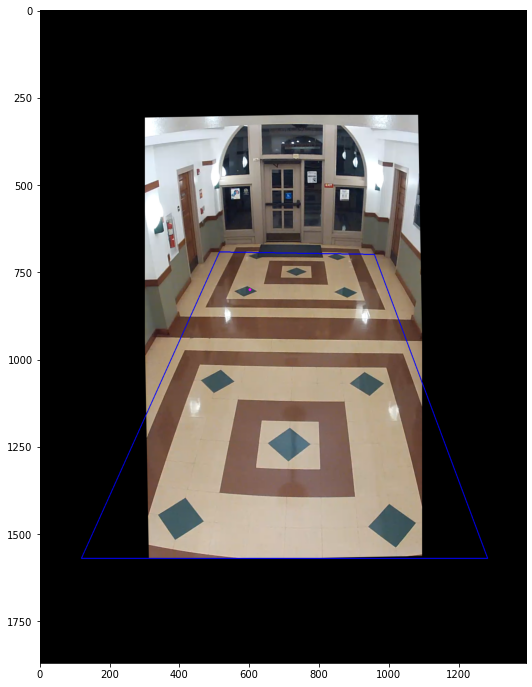

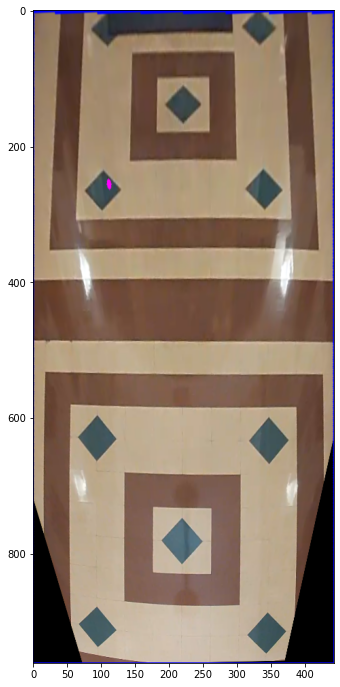

In [73]:
floorplan = skimage.io.imread(r'C:\Users\P Dog\Pictures\sample_map.PNG')
canvas = skimage.io.imread(r'C:\Users\P Dog\Pictures\floor_sample.PNG')
canvas = calibrate_image(canvas,box)
pad = np.zeros((np.shape(canvas)[0]+600,np.shape(canvas)[1]+600,3)).astype(np.uint8)
blank = np.zeros((np.shape(canvas)[0]+600,np.shape(canvas)[1]+600,3)).astype(np.uint8)
pad[:,:,0] = np.pad(canvas[:,:,0],300)
pad[:,:,1] = np.pad(canvas[:,:,1],300)
pad[:,:,2] = np.pad(canvas[:,:,2],300)

pt_A = [513,692]
pt_B = [118,1569]
pt_C = [1280,1569]
pt_D = [956,699]




pad = cv2.line(pad, pt_B, pt_A, color, thickness)
pad = cv2.line(pad, pt_A, pt_D, color, thickness)
pad = cv2.line(pad, pt_D, pt_C, color, thickness)
pad = cv2.line(pad, pt_B, pt_C, color, thickness)

cv2.imwrite(r'C:\Users\P Dog\Pictures\padded.png', pad)
plt.figure(figsize=(20,12))
cv2.circle(blank,[600,800],1,(255, 0, 255), 1)
cv2.circle(pad,[600,800],1,(255, 0, 255), 5)
plt.imshow(pad)



width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
width_BC = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
maxWidth = max(width_AD,width_BC)

height_AB = np.sqrt(((pt_B[0] - pt_A[0]) ** 2) + ((pt_B[1] - pt_A[1]) ** 2))
height_CD = np.sqrt(((pt_D[0] - pt_C[0]) ** 2) + ((pt_D[1] - pt_C[1]) ** 2))
maxHeight = max(height_AB,height_CD)


input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])

M = cv2.getPerspectiveTransform(input_pts,output_pts)


out = cv2.warpPerspective(pad,M,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR)

plt.figure(figsize=(20,12))
plt.imshow(out)


Artifact from lense causes distortion of 2 to 4 inches see bottom left corner

In [49]:
np.shape(floorplan)

(675, 379, 4)

In [50]:
r1 = [ [82,523],[82,76],[302,76],[302,523] ]
r2 = [ [675,0],[0,0],[0,379],[675,379]]


In [60]:
def scale_cord(r1,r2,cord):
    l1 = r2[2][0]-r2[0][0]
    w1 = r2[0][1]-r1[1][1]
    l2 = r2[0][0]-r1[1][0]
    w2 = r2[2][1]-r1[1][1] 
    print(l1,w1,l2,w2)
    warp_coord_x = l1/l2*cord[0]+r1[1][0]
    warp_coord_y = w1/w2 *cord[0]+r1[1][1]
    return [warp_coord_x,warp_coord_y]

In [61]:
final_cord = scale_cord(r1,r2,trans_cord)
print(final_cord)

82 76 82 76
[337.0, 331.0]


[46, 41, 37, 33, 30, 27, 23, 21, 20] [0 1 2 3 4 5 6 7 8]
2.888888888888889
[ 0.          5.68333333 11.36666667 17.05       22.73333333 28.41666667
 34.1        39.78333333]
[0 1 2 3 4 5 6 7]


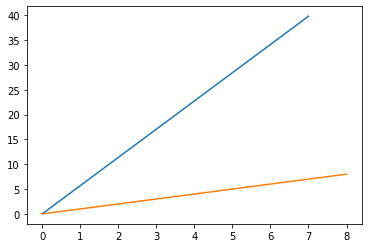

In [24]:
x = [614-568,568-527,527-490,490-457,457-427,427-400,400-377,377-356,356-336]
y = np.arange(len(x))
print(x,y)


print((46-20)/9)

x2 = np.arange(0,8)
y2 = x2*np.sin(np.arcsin(11/60))*31
print(y2)
print(x2)
plt.plot(x2,y2)
plt.plot(y)


In [26]:
print(7/11)

0.6363636363636364


387
393


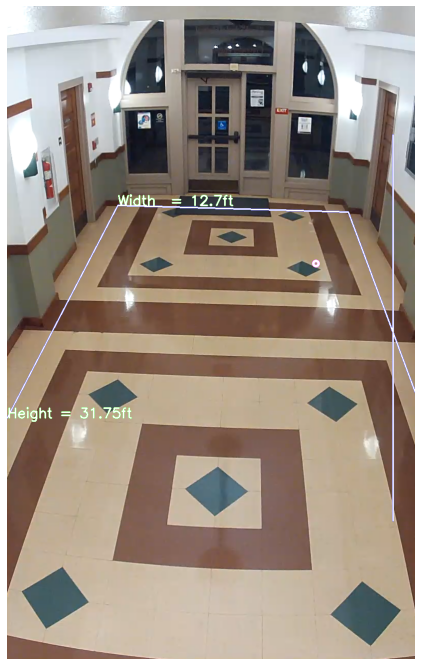

In [100]:
##Trig
def boundry_condition(box):
    print(box[1][1])
    upper_x_bound = np.mean((box[1][1],box[2][1])).astype(np.int)
    
    print(upper_x_bound)

def translate_postition(frame):
    translated = frame
    np.shape
    start_point = (750, 1000)
    end_point = ((750,250))
    color = (0, 0, 255)
    thickness = 2
    translated = cv2.line(translated, start_point, end_point, color, thickness)
    return translated

plt.figure(figsize=(20,12))
plt.imshow(translate_postition(canvas),vmax=255,vmin=0);plt.axis('off')
boundry_condition(box)

In [18]:
new_image = skimage.io.imread(r'C:\Users\P Dog\aktwelve_mask_rcnn\images\3862500489_6fd195d183_z.JPG')
plt.imshow(new_image)